# Linear Regression for Nonlinear Relationships

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO

The relationship between $x$ and $y$ in this data is nonlinear:

In [ ]:
np.random.seed(42)
x = np.linspace(0, 20, 100)
y = .5 * np.sin(.5*x) + np.random.normal(0, .2, 100)

plt.scatter(x, y)
plt.xticks([])
plt.yticks([]);

We have 100 data points $x_i.$

In [ ]:
len(x)

Let's try to fit a degree four polynomial of the form:
$$H(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4.$$
The design matrix and parameter vector are
$$
X = \begin{bmatrix}
    1 & x_1 & x_1^2 & x_1^3 & x_1^4\\
    1 & x_2 & x_2^2 & x_2^3 & x_2^4\\
    \vdots & \vdots & \vdots & \vdots & \vdots\\
    1 & x_{100} & x_{100}^2 & x_{100}^3 & x_{100}^4\\
\end{bmatrix},
\qquad 
\vec w = \begin{bmatrix}
    w_0\\
    w_1\\
    w_2 \\
    w_3\\
    w_4
\end{bmatrix}.$$

In code:

In [ ]:
X = np.column_stack((
    np.ones_like(x),
    x,
    x**2,
    x**3,
    x**4
))

Now we solve the normal equations, $X^\intercal X \vec w = X^\intercal \vec y$. We can do this using `np.linalg.solve`:

In [ ]:
w = np.linalg.solve(X.T @ X, X.T @ y)
w

This says the parameter vector is
$$\vec w = \begin{bmatrix}
    w_0\\
    w_1\\
    w_2 \\
    w_3\\
    w_4
\end{bmatrix} = \begin{bmatrix}
    0.041\\
    0.428\\
    -0.135 \\
    -.012\\
    -0.0003
\end{bmatrix},$$
so the best-fitting quartic is
$$H(x) =     0.041+
    0.428x
    -0.135x^2
    -.012x^3
    -0.0003x^4$$


Here we calculate the predicted value $H(x_i)$ for every point $x_i$ in our data set:

In [ ]:
y_pred = w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4
y_pred

But remember, the prediction vector $\vec h$ is also given by $$\vec h = X \vec w.$$

In [ ]:
X @ w

Let's plot our fitted quartic:

In [ ]:
plt.scatter(x, y)
plt.plot(x, X @ w, color='red')

Recall that we found
$$\vec w = \begin{bmatrix}
    w_0\\
    w_1\\
    w_2 \\
    w_3\\
    w_4
\end{bmatrix} = \begin{bmatrix}
    0.041\\
    0.428\\
    -0.135 \\
    -.012\\
    -0.0003
\end{bmatrix}.$$


It turns out that numpy has a function to find the least squares regression parameters for fitting a polynomial:

In [ ]:
np.polyfit(x, y, deg=4)

Notice that these are the same parameters we recovered, just in reverse order.

## Fitting higher order polynomials

If we are trying to fit a more complicated pattern, we might try using a higher-degree polynomial, with more "turns". But the system of equations obtained when trying to fit a high-degree polynomial is often "ill conditioned", meaning that the small numerical errors resulting from the finite precision of computer math may lead to big inaccuracies in the final result.

For example, consider the following data:

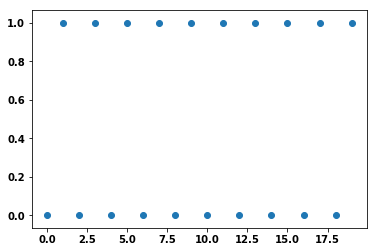

In [18]:
x = np.arange(20)
y = x % 2

plt.scatter(x, y)

In general, any $n$ points in two dimensions can be fit *exactly* by a polynomial of degree $n+1$. For instance, any two points is fit exactly by some line, any three points can be fit by some quadratic, any four points can be fit by some cubic, and so on. So in principle, there is a polynomial of degree $21$ which fits the above data exactly. But look what happens when we try to fit a polynomial with least squares regression:

In [19]:
w = np.polyfit(x, x%2, deg=21)
w

C:\Users\janin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


array([ 3.06950961e-18, -1.78544593e-16, -2.64352238e-15,  4.26148662e-13,
       -9.70741919e-12, -6.09395707e-11,  4.97865628e-09, -1.66306761e-08,
       -1.99676825e-06,  2.92444442e-05,  4.27046422e-04, -2.05685523e-02,
        3.52529815e-01, -3.67387035e+00,  2.58494575e+01, -1.26399830e+02,
        4.28023606e+02, -9.75388164e+02,  1.40798283e+03, -1.14099628e+03,
        3.85269470e+02,  2.14314300e-05])

You'll get an answer, but you probably got an ugly red message saying "Polyfit may be poorly conditioned". 


Moreover, the plot of the predictions is not so good. This means that while, in theory, we should be able to find a degree 21 polynomial to fit this data, in practice, it can be hard to compute a high-degree polynomial to fit our data. This is the best that Python can do:

C:\Users\janin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


(-2, 2)

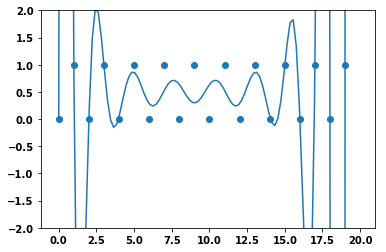

In [20]:
xx = np.linspace(0, 20, 100)
predictions = np.column_stack(xx**p for p in range(22)) @ w[::-1]

plt.plot(xx, predictions)
plt.scatter(x, x%2)
plt.ylim([-2,2])

So while high-order polynomials can, in theory, describe complicated patterns, in practice they are generally unsuitable for regression due to numerical issues.

We should also be careful of overfitting. Most data generating processes are not as "wiggly" as a high-degree polynomial. It's generally better to fit lower-degree polynomials that describe most of the variation in the data.